ML_RF_SizeStratify_100to299
* Machine Learning Training Data : size stratification
* Data originally pooled from all technologies

In [375]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [376]:
# Import Training Data
df_20to49 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_20to49_train_.csv')
df_50to99 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_50to99_train_.csv')
df_100to299 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_100to299_train_.csv')
df_300to399 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_300to399_train_.csv')
df_400to499 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_400to499_train_.csv')
df_500to999 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_500to999_train_.csv')
df_1000to5999 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_1000to5999_train_.csv')
df_6000 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_6000_train_.csv')

In [377]:
# Copy Dataframes for later parsing tasks
df_20to49_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_20to49_train.csv')
df_50to99_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_50to99_train.csv')
df_100to299_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_100to299_train.csv')
df_300to399_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_300to399_train.csv')
df_400to499_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_400to499_train.csv')
df_500to999_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_500to999_train.csv')
df_1000to5999_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_1000to5999_train.csv')
df_6000_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_6000_train.csv')

In [378]:
df_20to49['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

<a id='imbalance'></a>

<a id='hom_ref'></a>

In [379]:
# Import Test Data
df_20to49_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_20to49_test_.csv')
df_50to99_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test_.csv')
df_100to299_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_100to299_test_.csv')
df_300to399_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_300to399_test_.csv')
df_400to499_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_400to499_test_.csv')
df_500to999_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_500to999_test_.csv')
df_1000to5999_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_1000to5999_test_.csv')
df_6000_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_6000_test_.csv')

In [380]:
# Import Test Data
df_20to49_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_20to49_test.csv')
df_50to99_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test.csv')
df_100to299_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_100to299_test.csv')
df_300to399_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_300to399_test.csv')
df_400to499_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_400to499_test.csv')
df_500to999_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_500to999_test.csv')
df_1000to5999_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_1000to5999_test.csv')
df_6000_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_6000_test.csv')

In [381]:
df_20to49_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [382]:
df_20to49_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [383]:
# # Store header names in lists and find names that are NOT contained in BOTH lists
# c = list(df_train.columns.values)
# d = list(df_test.columns.values)
# set(d) - set(c)

***
EDA

Size distribution of sampled data set [all size datasets pooled]
***

In [384]:
# df_train = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/train/random_sample_SizeBins_szwt_train.csv')
# df_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/test/random_sample_SizeBins_szwt_test.csv')

In [385]:
# df_train['Size'].abs()
# df_test['Size'].abs()
# df_test = df_test[df_test['Size'] >= 20]

# df_train['log_size'] = np.log10(df_train.Size)
# df_test['log_size'] = np.log10(df_test.Size)

In [386]:
# sns.set_style("white")
# p = df_train['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
# p.grid(False)
# p.set_xlabel('Size[log10]')
# p.set_ylabel('Frequency')
# p.set_title('Training Set')
# # plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/SizeDist_training.png', bbox_inches='tight') 

In [387]:
# sns.set_style("white")
# p = df_test['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
# p.grid(False)
# p.set_xlabel('Size[log10]')
# p.set_ylabel('Frequency')
# p.set_title('Test Set')
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/SizeDist_test.png', bbox_inches='tight') 

***
**50-99bp**
***

***
Impute missing values using KNN
***

In [388]:
# Store training data in a new variable which will be converted to a matrix
X = df_100to299
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1,981.787879,9.308704,33.0,471.848485,85.718398,33.0,0.0,0.0,867.821229,...,11822.66667,5734.492150,3.0,0,0,0,0.000000,210706592,1,1.00000
1,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,884.718085,...,9228.06250,4608.919233,32.0,0,0,0,0.000000,98438243,1,1.00000
2,1,987.828829,17.550891,111.0,444.549550,77.353027,111.0,0.0,0.0,915.625360,...,5051.00000,4251.000000,2.0,0,0,1,0.081025,9045127,5,0.11327


In [389]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/261 with 1 missing, elapsed time: 0.062
Imputing row 101/261 with 1 missing, elapsed time: 0.074
Imputing row 201/261 with 1 missing, elapsed time: 0.083


In [390]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
df_100to299_header = list(df_100to299.columns.values)
X.columns = df_100to299_header
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1.0,981.787879,9.308704,33.0,471.848485,85.718398,33.0,0.0,0.0,867.821229,...,11822.66667,5734.492150,3.0,0.0,0.0,0.0,0.000000,210706592.0,1.0,1.00000
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,884.718085,...,9228.06250,4608.919233,32.0,0.0,0.0,0.0,0.000000,98438243.0,1.0,1.00000
2,1.0,987.828829,17.550891,111.0,444.549550,77.353027,111.0,0.0,0.0,915.625360,...,5051.00000,4251.000000,2.0,0.0,0.0,1.0,0.081025,9045127.0,5.0,0.11327


In [391]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y = X['GTcons']

In [392]:
#Count the number of labels
pd.value_counts(Y.values, sort=False)

1.0    108
0.0    110
2.0     43
dtype: int64

In [393]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [394]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

** Train Random Forest Classifier **

<a id='multi_run'></a>

** Determine Number of trees: Out of Bag Error **

In [395]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3)

In [396]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced') 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.



RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

**NOTE :** 

Determined OOB score based on 70% of the training data

In [397]:
n_estimators = 50
trees = []
oob = []
for i in range(1, n_estimators):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    trees += [i]
    oob += [model.oob_score_] 

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



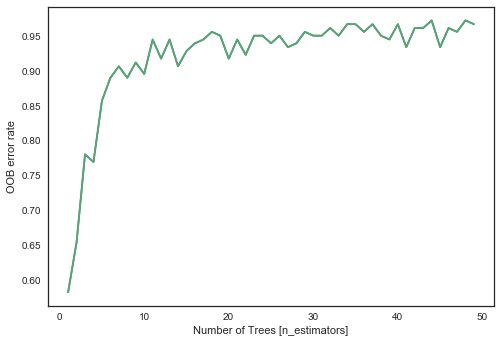

In [406]:
df_oob = pd.DataFrame()
df_oob['trees'] = trees
df_oob['oob'] = oob

ax = plt.plot(trees, oob)
sns.set_style("white")
plt.xlabel("Number of Trees [n_estimators]")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
#plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100-299bp_OOB.png', bbox_inches='tight')
plt.show()

** Train Model Using Optimal Tuning Parameters**

In [399]:
model = RandomForestClassifier(n_estimators=12, random_state=4, class_weight="balanced") 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=12, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

[Another Resource](https://stackoverflow.com/questions/37877542/how-to-label-the-feature-importance-with-forests-of-trees)

In [400]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

<a id='100_trees'></a>

In [407]:
# # %matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(8,30))
plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/df_100to299_featureImportance.png', bbox_inches='tight')
# plt.show()

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



In [402]:
feature_importances.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_feature_importance.csv')

In [403]:
X_ = X4[['pacbio.alt_reason_alignmentScore','pacbio.ref_alnScore_std','pacbio.ref_insertSize_std','Ill250.alt_insertSize_mean','pacbio.ref_reason_alignmentScore','pacbio.alt_alnScore_std','Ill300x.alt_count','Ill250.alt_alnScore_std','IllMP.ref_count','Ill300x.ref_count','pacbio.ref_insertSize_mean','pacbio.alt_insertSize_mean','TenX.HP2_alt_count','IllMP.alt_reason_alignmentScore','Ill250.alt_alnScore_mean','TenX.HP2_alt_insertSize_mean','Ill250.ref_insertSize_std','pacbio.alt_count','TenX.HP1_alt_reason_alignmentScore','Ill250.alt_count','TenX.HP1_amb_alnScore_std','TenX.HP2_amb_alnScore_std','Ill250.alt_insertSize_std','Ill250.alt_reason_alignmentScore','pacbio.ref_count']]

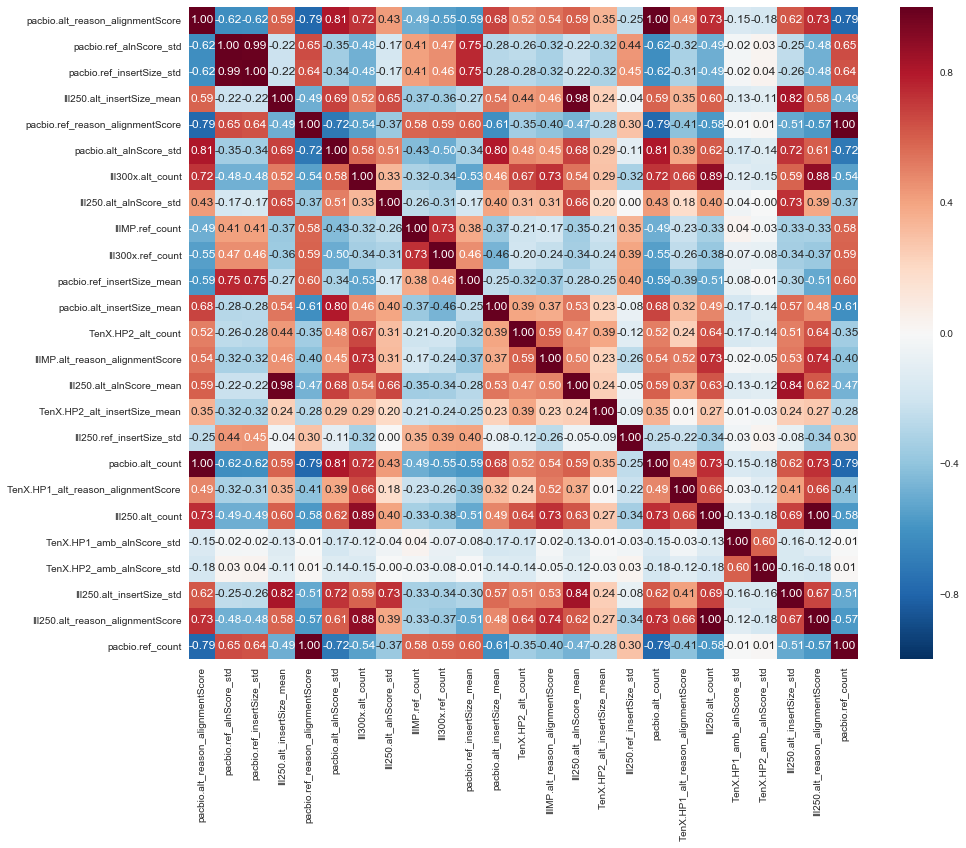

In [404]:
plt.figure(figsize=(15, 12))
sns.heatmap(X_.corr(), annot=True, fmt=".2f")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
# plt.figure(figsize=(18, 18))
plt.show()
#plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/df_100to299_heatmap.png', bbox_inches='tight')

In [31]:
#NOTE: Training Set - Show number of Hom Ref, Hom Var, Het Var datapoints the model was trained on
ytrain = pd.DataFrame()
ytrain['ytrain'] = y_train
pd.value_counts(ytrain['ytrain'].values, sort=False)

0.0    73
1.0    79
2.0    30
dtype: int64

<a id='prediction_step'></a>

In [32]:
pred = model.predict(X_test)

<a id='traintest_precision'></a>

In [33]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(y_test, pred, average='micro'))) 

Precision score of the training subset: 0.949


In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy score of the training subset: {:.3f}'.format(accuracy_score(y_test, pred))) 

Accuracy score of the training subset: 0.949


In [35]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
df_Xtest.head()

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
246,943.840000,35.535537,25.0,416.560000,94.600245,25.0,0.0,0.0,832.514970,160.470821,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,27935358.0,1.0,1.0
56,977.370968,20.065404,62.0,461.467742,92.003807,56.0,6.0,0.0,887.350785,148.388261,...,4976.50000,2109.500000,2.0,0.0,0.0,0.0,0.0,94657363.0,0.0,0.0
128,984.052632,13.589755,19.0,427.473684,101.171750,19.0,0.0,0.0,881.673684,155.248117,...,10784.89474,3556.918372,19.0,0.0,0.0,0.0,0.0,34022524.0,0.0,0.0
236,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,889.805714,165.238518,...,10485.46512,4305.661402,43.0,0.0,0.0,0.0,0.0,79928820.0,0.0,0.0
210,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,831.989691,156.174730,...,10496.51282,3453.648319,39.0,0.0,0.0,0.0,0.0,97992038.0,1.0,1.0


In [36]:
labels = pd.DataFrame(y_test)

In [45]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_100to299['GTcons']
df_Xtest['chrom'] = df_100to299['chrom']
df_Xtest['start'] = df_100to299['start']
df_Xtest['end'] = df_100to299['end']

In [46]:
df_Xtest['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [47]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

Heterozygous_Variant    29
Homozygous_Variant      13
Homozygous_Reference    37
dtype: int64

In [48]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

Heterozygous_Variant    28
Homozygous_Variant      15
Homozygous_Reference    36
dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[27  0  2]
 [ 0 36  1]
 [ 1  0 12]]


In [50]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,27,0,2,29
Homozygous_Reference,0,36,1,37
Homozygous_Variant,1,0,12,13
All,28,36,15,79


<a id='traintest_confusion_matrix'></a>

In [51]:
# # Pandas: save table to HTML
# p = pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)
# p.to_html('cro.html')

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.96      0.93      0.95        29
Homozygous_Reference       1.00      0.97      0.99        37
  Homozygous_Variant       0.80      0.92      0.86        13

         avg / total       0.95      0.95      0.95        79



***
Predict
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

In [88]:
df_100to299_test.drop(['GTcons'],axis=1, inplace=True)

In [89]:
X2 = df_100to299_test

** Impute missing values using KNN **

In [90]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/339 with 2 missing, elapsed time: 0.096
Imputing row 101/339 with 87 missing, elapsed time: 0.102
Imputing row 201/339 with 1 missing, elapsed time: 0.118
Imputing row 301/339 with 2 missing, elapsed time: 0.131


In [91]:
df_100to299_test_header = list(df_100to299_test.columns.values)
X2.columns = df_100to299_test_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,983.052632,14.608843,19.0,472.315789,88.597287,18.0,1.0,0.0,869.614035,169.177068,...,9629.750000,3167.022576,32.0,0.0,0.0,0.0,0.0,74312431.0,0.0,0.0
1,908.000000,0.000000,1.0,547.000000,0.000000,0.0,1.0,0.0,892.635945,150.764966,...,11648.902440,2866.042175,41.0,0.0,0.0,1.0,1.0,83753489.0,1.0,1.0
2,949.375000,51.051292,8.0,410.500000,110.576896,7.0,1.0,0.0,817.587065,145.576102,...,8411.857143,3674.965187,14.0,0.0,0.0,0.0,0.0,247569530.0,0.0,0.0


In [92]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,983.052632,14.608843,19.0,472.315789,88.597287,18.0,1.0,0.0,869.614035,169.177068,...,9629.750000,3167.022576,32.0,0.0,0.0,0.0,0.0,74312431.0,0.0,0.0
1,908.000000,0.000000,1.0,547.000000,0.000000,0.0,1.0,0.0,892.635945,150.764966,...,11648.902440,2866.042175,41.0,0.0,0.0,1.0,1.0,83753489.0,1.0,1.0
2,949.375000,51.051292,8.0,410.500000,110.576896,7.0,1.0,0.0,817.587065,145.576102,...,8411.857143,3674.965187,14.0,0.0,0.0,0.0,0.0,247569530.0,0.0,0.0


In [93]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [94]:
pred = model.predict(X5)

In [95]:
pred_prob = model.predict_proba(X5)

In [96]:
pred_prob_log = model.predict_log_proba(X5)

In [97]:
X5['predicted_label'] = pred
X5['chrom'] = df_100to299_test_['chrom']
X5['GTcons'] = df_100to299_test_['GTcons']
X5['start'] = df_100to299_test_['start']
X5['end'] = df_100to299_test_['end']
X5['Size'] = df_100to299_test_['Size']
X5['GTsupp'] = df_100to299_test_['GTsupp']

In [98]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [99]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [100]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/df_100to299.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/100to299/df_100to299_log.csv', index=False)

In [101]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/df_100to299.csv')

In [102]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [103]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,GTsupp,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.0,1.0,0.0,1,4,983.052632,14.608843,19,472.315789,88.597287,...,3167.022576,32,1,0,0,0,0.0,74312431,0,0.0
1,1.0,0.0,0.0,0,2,908.000000,0.000000,1,547.000000,0.000000,...,2866.042175,41,0,0,0,1,1.0,83753489,1,1.0
2,0.0,1.0,0.0,1,3,949.375000,51.051292,8,410.500000,110.576896,...,3674.965187,14,1,0,0,0,0.0,247569530,0,0.0


In [104]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/df_100to299_final.csv', index=False)

In [ ]:
# X6['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
# X6['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
# X6['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X7['GTcons'].isnull().sum()

***
Label Analysis
***

In [105]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[136   1   2]
 [  0 125   5]
 [  0   3  67]]


In [106]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [107]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.968


In [108]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.968


In [109]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,125,0,5,130
Homozygous_Reference,1,136,2,139
Homozygous_Variant,3,0,67,70
All,129,136,74,339


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [110]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [111]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,84,0,0,84
Homozygous_Reference,0,122,0,122
Homozygous_Variant,0,0,39,39
All,84,122,39,245


In [112]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00        84
Homozygous_Reference       1.00      1.00      1.00       122
  Homozygous_Variant       1.00      1.00      1.00        39

         avg / total       1.00      1.00      1.00       245



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 1000+ bp
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

* Pool all datasets with large variants 1000 - 6000+

In [113]:
df = pd.concat([df_1000to5999, df_1000to5999_test, df_6000, df_6000_test], axis=0)
df = df.reset_index()
df2 = df
df_ = pd.concat([df_1000to5999_, df_1000to5999_test_, df_6000_, df_6000_test_], axis=0)
df_ = df_.reset_index()

In [114]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df_.drop(['index'],axis=1, inplace=True)

In [115]:
X2 = df

** Impute missing values using KNN **

In [116]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/284 with 1 missing, elapsed time: 0.068
Imputing row 101/284 with 1 missing, elapsed time: 0.082
Imputing row 201/284 with 57 missing, elapsed time: 0.088


In [117]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.238636,151.265870,...,10683.11594,5291.525830,69.0,0.0,0.0,0.0,0.0,66398770.0,6.0,0.097264
1,972.727273,15.764407,44.0,446.931818,81.055368,35.0,9.0,0.0,861.743750,161.249545,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,14189915.0,3.0,0.037082
2,977.161290,15.238103,31.0,422.161290,57.943853,28.0,3.0,0.0,886.130045,129.576288,...,10714.20833,3615.789459,24.0,0.0,0.0,0.0,0.0,20950622.0,10.0,0.076469


In [118]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.238636,151.265870,...,10683.11594,5291.525830,69.0,0.0,0.0,0.0,0.0,66398770.0,6.0,0.097264
1,972.727273,15.764407,44.0,446.931818,81.055368,35.0,9.0,0.0,861.743750,161.249545,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,14189915.0,3.0,0.037082
2,977.161290,15.238103,31.0,422.161290,57.943853,28.0,3.0,0.0,886.130045,129.576288,...,10714.20833,3615.789459,24.0,0.0,0.0,0.0,0.0,20950622.0,10.0,0.076469


In [119]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [120]:
pred = model.predict(X5)

In [121]:
pred_prob = model.predict_proba(X5)

In [122]:
pred_prob_log = model.predict_log_proba(X5)

In [123]:
df[df.index.duplicated()]

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct


In [124]:
X5['predicted_label'] = pred
X5['chrom'] = df_['chrom']
X5['GTcons'] = df_['GTcons']
X5['start'] = df_['start']
X5['end'] = df_['end']
X5['Size'] = df_['Size']
X5['GTsupp'] = df_['GTsupp']

In [125]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [126]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [127]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_log._predLrgcsv', index=False)

In [128]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_predLrg.csv')

In [129]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [130]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [131]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,GTsupp,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.916667,0.083333,0.00,0,5,0.000000,0.000000,0.0,0.000000,0.000000,...,5291.525830,69.0,0,0,0,0,0.0,66398770,6,0.097264
1,0.000000,0.250000,0.75,2,3,972.727273,15.764407,44.0,446.931818,81.055368,...,0.000000,0.0,2,0,0,0,0.0,14189915,3,0.037082
2,0.000000,1.000000,0.00,1,5,977.161290,15.238103,31.0,422.161290,57.943853,...,3615.789459,24.0,1,0,0,0,0.0,20950622,10,0.076469


In [132]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_final_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [133]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [134]:
X6.GTcons = X6.GTcons.astype(int)

In [135]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    120
1    100
2     64
dtype: int64


***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [136]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[118   2   0]
 [  2  97   1]
 [  1   4  59]]


In [137]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [138]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.965


In [139]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.965


In [140]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,97,2,1,100
Homozygous_Reference,2,118,0,120
Homozygous_Variant,4,1,59,64
All,103,121,60,284


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [141]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [142]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,59,0,0,59
Homozygous_Reference,0,114,0,114
Homozygous_Variant,2,0,20,22
All,61,114,20,195


In [143]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.97      1.00      0.98        59
Homozygous_Reference       1.00      1.00      1.00       114
  Homozygous_Variant       1.00      0.91      0.95        22

         avg / total       0.99      0.99      0.99       195



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 1000 - 5999 bp
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

* Pool all datasets with large variants 1000 - 5999

In [276]:
df = pd.concat([df_1000to5999, df_1000to5999_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_1000to5999_, df_1000to5999_test_], axis=0)
df2 = df2.reset_index()

In [277]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [278]:
X2 = df

** Impute missing values using KNN **

In [279]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/227 with 1 missing, elapsed time: 0.045
Imputing row 101/227 with 1 missing, elapsed time: 0.059
Imputing row 201/227 with 57 missing, elapsed time: 0.064


In [280]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.238636,151.265870,...,10683.11594,5291.525830,69.0,0.0,0.0,0.0,0.0,66398770.0,6.0,0.097264
1,972.727273,15.764407,44.0,446.931818,81.055368,35.0,9.0,0.0,861.743750,161.249545,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,14189915.0,3.0,0.037082
2,977.161290,15.238103,31.0,422.161290,57.943853,28.0,3.0,0.0,886.130045,129.576288,...,10714.20833,3615.789459,24.0,0.0,0.0,0.0,0.0,20950622.0,10.0,0.076469


In [281]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.238636,151.265870,...,10683.11594,5291.525830,69.0,0.0,0.0,0.0,0.0,66398770.0,6.0,0.097264
1,972.727273,15.764407,44.0,446.931818,81.055368,35.0,9.0,0.0,861.743750,161.249545,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,14189915.0,3.0,0.037082
2,977.161290,15.238103,31.0,422.161290,57.943853,28.0,3.0,0.0,886.130045,129.576288,...,10714.20833,3615.789459,24.0,0.0,0.0,0.0,0.0,20950622.0,10.0,0.076469


In [282]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [283]:
pred = model.predict(X5)

In [284]:
pred_prob = model.predict_proba(X5)

In [285]:
pred_prob_log = model.predict_log_proba(X5)

In [286]:
df[df.index.duplicated()]

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct


In [288]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df['GTsupp']

In [289]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [290]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [291]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_1000to5999_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_log_1000to5999_.csv', index=False)

In [292]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_1000to5999_predLrg.csv')

In [293]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [294]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [295]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.916667,0.083333,0.00,0,0.000000,0.000000,0,0.000000,0.000000,0,...,5291.525830,69.0,0,0,0,0,0.0,66398770,6,0.097264
1,0.000000,0.250000,0.75,2,972.727273,15.764407,44,446.931818,81.055368,35,...,0.000000,0.0,2,0,0,0,0.0,14189915,3,0.037082
2,0.000000,1.000000,0.00,1,977.161290,15.238103,31,422.161290,57.943853,28,...,3615.789459,24.0,1,0,0,0,0.0,20950622,10,0.076469


In [296]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_final_1000to5999_predLrg.csv', index=False)

In [297]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [298]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [299]:
X6.GTcons = X6.GTcons.astype(int)

In [300]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    93
1    80
2    54
dtype: int64


***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [301]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[90  3  0]
 [ 0 79  1]
 [ 1  4 49]]


In [302]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [303]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.960


In [304]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.960


In [305]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,79,0,1,80
Homozygous_Reference,3,90,0,93
Homozygous_Variant,4,1,49,54
All,86,91,50,227


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [306]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [307]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,49,0,0,49
Homozygous_Reference,0,87,0,87
Homozygous_Variant,2,0,14,16
All,51,87,14,152


In [308]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.96      1.00      0.98        49
Homozygous_Reference       1.00      1.00      1.00        87
  Homozygous_Variant       1.00      0.88      0.93        16

         avg / total       0.99      0.99      0.99       152



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 6000+ bp
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

* Pool all datasets with large variants 6000+

In [309]:
df = pd.concat([df_6000, df_6000_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_6000, df_6000_test], axis=0)
df2 = df2.reset_index()

In [310]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [311]:
X2 = df

** Impute missing values using KNN **

In [312]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/57 with 2 missing, elapsed time: 0.005


In [313]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,938.807692,17.007960,52.0,478.903846,84.485834,45.0,7.0,0.0,897.581731,141.008841,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,151456429.0,9.0,0.031567
1,967.517241,14.852425,29.0,430.965517,70.471556,28.0,1.0,0.0,882.136546,141.793126,...,9140.708333,4370.268586,72.000000,0.0,0.0,0.0,0.000000,146862618.0,33.0,0.055111
2,977.700000,17.343875,20.0,451.850000,87.001882,17.0,3.0,0.0,844.818436,134.444514,...,9168.799423,4232.174053,109.449801,0.0,0.0,4.0,0.076523,72766323.0,110.0,0.059979


In [314]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,938.807692,17.007960,52.0,478.903846,84.485834,45.0,7.0,0.0,897.581731,141.008841,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,151456429.0,9.0,0.031567
1,967.517241,14.852425,29.0,430.965517,70.471556,28.0,1.0,0.0,882.136546,141.793126,...,9140.708333,4370.268586,72.000000,0.0,0.0,0.0,0.000000,146862618.0,33.0,0.055111
2,977.700000,17.343875,20.0,451.850000,87.001882,17.0,3.0,0.0,844.818436,134.444514,...,9168.799423,4232.174053,109.449801,0.0,0.0,4.0,0.076523,72766323.0,110.0,0.059979


In [315]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [316]:
pred = model.predict(X5)

In [317]:
pred_prob = model.predict_proba(X5)

In [318]:
pred_prob_log = model.predict_log_proba(X5)

In [319]:
df[df.index.duplicated()]

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct


In [321]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df2['GTsupp']

In [322]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [323]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [324]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_6000_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_log_6000_.csv', index=False)

In [325]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_6000_predLrg.csv')

In [326]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [327]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [328]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.083333,0.916667,2,938.807692,17.007960,52.0,478.903846,84.485834,45.0,...,0.000000,0.000000,2,0,0,0,0.000000,151456429,9,0.031567
1,0.083333,0.833333,0.083333,1,967.517241,14.852425,29.0,430.965517,70.471556,28.0,...,4370.268586,72.000000,1,0,0,0,0.000000,146862618,33,0.055111
2,0.583333,0.416667,0.000000,1,977.700000,17.343875,20.0,451.850000,87.001882,17.0,...,4232.174053,109.449801,0,0,0,4,0.076523,72766323,110,0.059979


In [329]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_final_6000_predLrg.csv', index=False)

In [330]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [331]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [332]:
X6.GTcons = X6.GTcons.astype(int)

In [333]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    27
1    20
2    10
dtype: int64


***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [334]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[27  0  0]
 [ 2 18  0]
 [ 0  0 10]]


In [335]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [336]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.965


In [337]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.965


In [338]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,18,2,0,20
Homozygous_Reference,0,27,0,27
Homozygous_Variant,0,0,10,10
All,18,29,10,57


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [339]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [340]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,10,0,0,10
Homozygous_Reference,0,27,0,27
Homozygous_Variant,0,0,5,5
All,10,27,5,42


In [341]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00        10
Homozygous_Reference       1.00      1.00      1.00        27
  Homozygous_Variant       1.00      1.00      1.00         5

         avg / total       1.00      1.00      1.00        42



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 20 to 49bp
***

<a id='predict'></a>

** Load Data **

* Pool all datasets with large variants 20 to 49bp

In [342]:
df = pd.concat([df_20to49, df_20to49_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_20to49, df_20to49_test], axis=0)
df2 = df2.reset_index()

In [343]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [344]:
X2 = df

** Impute missing values using KNN **

In [345]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/3350 with 1 missing, elapsed time: 10.558
Imputing row 101/3350 with 1 missing, elapsed time: 10.578
Imputing row 201/3350 with 2 missing, elapsed time: 10.595
Imputing row 301/3350 with 2 missing, elapsed time: 10.612
Imputing row 401/3350 with 2 missing, elapsed time: 10.626
Imputing row 501/3350 with 2 missing, elapsed time: 10.647
Imputing row 601/3350 with 1 missing, elapsed time: 10.662
Imputing row 701/3350 with 2 missing, elapsed time: 10.678
Imputing row 801/3350 with 1 missing, elapsed time: 10.696
Imputing row 901/3350 with 58 missing, elapsed time: 10.710
Imputing row 1001/3350 with 2 missing, elapsed time: 10.721
Imputing row 1101/3350 with 1 missing, elapsed time: 10.739
Imputing row 1201/3350 with 2 missing, elapsed time: 10.755
Imputing row 1301/3350 with 2 missing, elapsed time: 10.774
Imputing row 1401/3350 with 1 missing, elapsed time: 10.792
Imputing row 1501/3350 with 2 missing, elapsed time: 10.822
Imputing row 1601/3350 with 2 missing, elapsed time

In [346]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,976.871795,12.113098,39.0,431.384615,91.092406,39.0,0.0,0.0,890.273292,144.669681,...,8754.50,3356.194618,30.0,0.0,0.0,0.0,0.0,65359519.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,907.097143,146.444984,...,10767.32,3791.304854,50.0,0.0,0.0,0.0,0.0,44564287.0,1.0,1.000000
2,980.865672,12.845692,67.0,430.701492,88.234426,67.0,0.0,0.0,883.863905,158.467660,...,18545.00,0.000000,1.0,0.0,0.0,1.0,1.0,96806440.0,1.0,0.586207


In [347]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,976.871795,12.113098,39.0,431.384615,91.092406,39.0,0.0,0.0,890.273292,144.669681,...,8754.50,3356.194618,30.0,0.0,0.0,0.0,0.0,65359519.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,907.097143,146.444984,...,10767.32,3791.304854,50.0,0.0,0.0,0.0,0.0,44564287.0,1.0,1.000000
2,980.865672,12.845692,67.0,430.701492,88.234426,67.0,0.0,0.0,883.863905,158.467660,...,18545.00,0.000000,1.0,0.0,0.0,1.0,1.0,96806440.0,1.0,0.586207


In [348]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [349]:
pred = model.predict(X5)

In [350]:
pred_prob = model.predict_proba(X5)

In [351]:
pred_prob_log = model.predict_log_proba(X5)

In [352]:
df[df.index.duplicated()]

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct


In [354]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df2['GTsupp']

In [355]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [356]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [357]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_20to49_predsm.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_log_20to49_.csv', index=False)

In [358]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_20to49_predsm.csv')

In [359]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [360]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [361]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,1.000000,0.000000,1,976.871795,12.113098,39.0,431.384615,91.092406,39.0,...,3356.194618,30.0,1,0,0,0,0.0,65359519,0,0.000000
1,0.916667,0.083333,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,3791.304854,50.0,0,0,0,0,0.0,44564287,1,1.000000
2,0.166667,0.250000,0.583333,1,980.865672,12.845692,67.0,430.701492,88.234426,67.0,...,0.000000,1.0,2,0,0,1,1.0,96806440,1,0.586207


In [362]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_final_20to49_predsm.csv', index=False)

In [363]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [364]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [365]:
X6.GTcons = X6.GTcons.astype(int)

In [366]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0     945
2     581
1    1824
dtype: int64


***
Label Analysis
***

In [367]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[ 932   11    2]
 [  33 1733   58]
 [   5   64  512]]


In [368]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [369]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.948


In [370]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.948


In [371]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1733,33,58,1824
Homozygous_Reference,11,932,2,945
Homozygous_Variant,64,5,512,581
All,1808,970,572,3350


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [372]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [373]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1146,0,0,1146
Homozygous_Reference,1,831,0,832
Homozygous_Variant,0,0,250,250
All,1147,831,250,2228


In [374]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00      1146
Homozygous_Reference       1.00      1.00      1.00       832
  Homozygous_Variant       1.00      1.00      1.00       250

         avg / total       1.00      1.00      1.00      2228

